# Set Working Directory and List

In [87]:
# Set working directory
import os
#os.chdir('C:/Users/Sven Konermann/Documents/Master/2_Semester/Applied_Data_Science/Gruppe')
os.chdir('C:/Users/manue/OneDrive - ZHAW/MSc Wirtschaftsinformatik/2. Semester/Applied Data Science/ADS Projekt')
# Warnings settings
import warnings
warnings.filterwarnings("ignore")

In [88]:
ua_path = "user_agents.txt"
ua_list = [line.rstrip('\n') for line in open(ua_path)]
ua_list[:5]

['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:72.0) Gecko/20100101 Firefox/72.0',
 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_2) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.4 Safari/605.1.15']

In [89]:
# List with URLS for Webscraping part 1
url_1_raw = "URL_1.txt"
url_1 = [line.rstrip('\n') for line in open(url_1_raw)]
url_1[:5]

['https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=20735&dateStart=01.05.',
 'https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=193736&dateStart=01.05.',
 'https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=324977&dateStart=01.05.',
 'https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=1555183&dateStart=01.05.',
 'https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=3193857&dateStart=01.05.']

In [90]:
# List with URLS for Webscraping part 2
url_2_raw = "URL_2.txt"
url_2 = [line.rstrip('\n') for line in open(url_2_raw)]
url_2[:5]

['&interval=Y5&assetName=DAX&exchange=auÃŸerbÃ¶rslich',
 '&interval=Y5&assetName=EURO STOXX 50&exchange=auÃŸerbÃ¶rslich',
 '&interval=Y5&assetName=Dow Jones&exchange=auÃŸerbÃ¶rslich',
 '&interval=Y5&assetName=SMI&exchange=auÃŸerbÃ¶rslich',
 '&interval=Y5&assetName=MSCI WORLD &exchange=auÃŸerbÃ¶rslich']

## Get Data with automated Scraping (Onvista)

In [ ]:
from selenium import webdriver
#from selenium.webdriver.chrome.options import Options
from selenium.webdriver.firefox.options import Options
import random

opts = Options()
opts.add_argument("--headless")
#opts.add_argument("--window-size=1200,800")
opts.add_argument("user-agent=" + random.choice(ua_list))
#driver = webdriver.Chrome(executable_path='chromedriver.exe', options=opts)
driver = webdriver.Chrome(executable_path='geckodriver.exe', options=opts)

#Websites to Scrape
IndexListe= ["DAX", "EURO STOXX 50", "Dow Jones",  "SMI", "MSCI World", "FTSE", "ATX", "SDAX", "Tec DAX", "NASDAQ 100", "Nikkei", "Hang Seng", "SHANGHAI STOCK EXCHANGE B SHARES", "Emerging Markets", "Bovespa"]

#IndexListe= ["DAX"]

# Daten in csv Datei schreiben
import pandas as pd
import csv



#Scraping Loop
x=0
while x < len(url_1):
    Text=""
    Jahr=2002
    while Jahr <=2017:
        URL = str(url_1[x])+str(Jahr)+str(url_2[x])
        driver.get(URL)
        text1 = driver.find_element_by_css_selector('body > div.INHALT.WEBSEITE > article > table > tbody').text
        Text= Text + '\n' + text1
        templist = []
        Table_dict={ 'Gescrapte Finanzdaten': Text}
        templist.append(Table_dict)
        df = pd.DataFrame(templist)
        df.to_csv(IndexListe[x]+".csv")
        Jahr+=5
    x+=1
    
    



# Examples using tag name
#text = driver.find_element_by_xpath('/html/body/div[1]/article').text

# Further examples (find out by yourself)
# text = driver.find_element_by_name('').text
# text = driver.find_element_by_tag_name('').text
# text = driver.find_element_by_id('').text

## Data Cleansing and Preparation onvista

In [94]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline
IndexListe= ["DAX", "EURO STOXX 50", "Dow Jones",  "SMI", "MSCI World", "FTSE", "ATX", "SDAX", "Tec DAX", "NASDAQ 100", "Nikkei", "Hang Seng", "SHANGHAI STOCK EXCHANGE B SHARES", "Emerging Markets", "Bovespa"]
SchlussIndexListe= ["Schluss DAX", "Schluss EURO STOXX 50", "Schlusss Dow Jones",  "Schluss SMI", "Schluss MSCI World", "Schluss FTSE", "Schluss ATX", "Schluss SDAX", "Schluss Tec DAX", "Schluss NASDAQ 100", "Schluss Nikkei", "Schluss Hang Seng", "Schluss SHANGHAI STOCK EXCHANGE B SHARES", "Schluss Emerging Markets", "Schluss Bovespa"]
Indexdf= ["dfDAX", "dfEURO STOXX 50", "dfDow Jones",  "dfSMI", "dfMSCI World", "dfFTSE", "dfATX", "dfSDAX", "dfTec DAX", "dfNASDAQ 100", "dfNikkei", "dfHang Song", "dfSHANGHAI STOCK EXCHANGE B SHARES", "Emerging Markets", "Bovespa"]
x=0
j=0
while x < len(IndexListe):
    Indexdf[x]= pd.read_csv(IndexListe[x]+".csv", delimiter=' ', header=None, skiprows=2, names=['Datum','Eröffnung','Hoch','Tief',SchlussIndexListe[x],'Volumen'], index_col=False)
    Indexdf[x]=pd.DataFrame(Indexdf[x])
    Indexdf[x].drop(columns=['Eröffnung','Hoch','Tief','Volumen'], inplace=True)
    x+=1

x=1
result=Indexdf[0]
while x < len(IndexListe):
    result=pd.merge(result, Indexdf[x], how="inner", on="Datum")
    x+=1
    
x=0
while x < len(IndexListe):
    for i in range (len(result)):
        result.loc[i,SchlussIndexListe[x]] = result.loc[i,SchlussIndexListe[x]].replace('.','')
        result.loc[i,SchlussIndexListe[x]] = result.loc[i,SchlussIndexListe[x]].replace(',','.')
        i+=1
    x+=1

#df
#result=pd.concat([Indexdf[0], Indexdf[1]], axis=1)
#result=Indexdf[0].append([Indexdf[1], Indexdf[2], Indexdf[3], Indexdf[4], Indexdf[5], Indexdf[6], Indexdf[7], Indexdf[8], Indexdf[9], Indexdf[10], Indexdf[11], Indexdf[12]])

#result = result.dropna()
# Show the content of the dataframe:



In [95]:
result.shape

(3773, 16)

In [96]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3773 entries, 0 to 3772
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Datum                                     3773 non-null   object
 1   Schluss DAX                               3773 non-null   object
 2   Schluss EURO STOXX 50                     3773 non-null   object
 3   Schlusss Dow Jones                        3773 non-null   object
 4   Schluss SMI                               3773 non-null   object
 5   Schluss MSCI World                        3773 non-null   object
 6   Schluss FTSE                              3773 non-null   object
 7   Schluss ATX                               3773 non-null   object
 8   Schluss SDAX                              3773 non-null   object
 9   Schluss Tec DAX                           3773 non-null   object
 10  Schluss NASDAQ 100                        3773 n

In [97]:
result[SchlussIndexListe] = result[SchlussIndexListe].astype(float, errors = 'raise')
print(result.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3773 entries, 0 to 3772
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Datum                                     3773 non-null   object 
 1   Schluss DAX                               3773 non-null   float64
 2   Schluss EURO STOXX 50                     3773 non-null   float64
 3   Schlusss Dow Jones                        3773 non-null   float64
 4   Schluss SMI                               3773 non-null   float64
 5   Schluss MSCI World                        3773 non-null   float64
 6   Schluss FTSE                              3773 non-null   float64
 7   Schluss ATX                               3773 non-null   float64
 8   Schluss SDAX                              3773 non-null   float64
 9   Schluss Tec DAX                           3773 non-null   float64
 10  Schluss NASDAQ 100                  

In [98]:
result = result.dropna()
result.isna().sum()

Datum                                       0
Schluss DAX                                 0
Schluss EURO STOXX 50                       0
Schlusss Dow Jones                          0
Schluss SMI                                 0
Schluss MSCI World                          0
Schluss FTSE                                0
Schluss ATX                                 0
Schluss SDAX                                0
Schluss Tec DAX                             0
Schluss NASDAQ 100                          0
Schluss Nikkei                              0
Schluss Hang Seng                           0
Schluss SHANGHAI STOCK EXCHANGE B SHARES    0
Schluss Emerging Markets                    0
Schluss Bovespa                             0
dtype: int64

In [99]:
result.isnull().sum()

Datum                                       0
Schluss DAX                                 0
Schluss EURO STOXX 50                       0
Schlusss Dow Jones                          0
Schluss SMI                                 0
Schluss MSCI World                          0
Schluss FTSE                                0
Schluss ATX                                 0
Schluss SDAX                                0
Schluss Tec DAX                             0
Schluss NASDAQ 100                          0
Schluss Nikkei                              0
Schluss Hang Seng                           0
Schluss SHANGHAI STOCK EXCHANGE B SHARES    0
Schluss Emerging Markets                    0
Schluss Bovespa                             0
dtype: int64

In [100]:
result.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3768    False
3769    False
3770    False
3771    False
3772    False
Length: 3773, dtype: bool

In [101]:
result.duplicated().sum()

0

In [102]:
result.describe()

,Schluss DAX,Schluss EURO STOXX 50,Schlusss Dow Jones,Schluss SMI,Schluss MSCI World,Schluss FTSE,Schluss ATX,Schluss SDAX,Schluss Tec DAX,Schluss NASDAQ 100,Schluss Nikkei,Schluss Hang Seng,Schluss SHANGHAI STOCK EXCHANGE B SHARES,Schluss Emerging Markets,Schluss Bovespa
count,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.00000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000
mean,8550.419011,3191.705274,16771.938249,7911.460668,1613.512999,6061.554718,2779.153994,7190.412945,1451.34216,4359.411967,15887.306422,21506.246886,235.365964,921.801718,60636.199134
std,3444.438166,564.651373,7428.616086,1853.527860,553.007224,1000.611558,799.192931,3892.874125,986.41658,3720.321670,5791.196812,5165.454161,90.697177,243.351618,26808.515976
min,2423.870000,1817.240000,6594.440000,4085.600000,688.638000,3512.090000,1159.880000,1694.580000,329.52000,1018.660000,7054.980000,8409.000000,51.340000,272.267000,11206.000000
25%,5802.260000,2774.200000,10858.140000,6319.180000,1193.880000,5395.700000,2228.520000,4166.520000,707.19000,1734.680000,10646.950000,18892.790000,177.790000,807.454000,45120.360000
50%,7741.700000,3161.600000,13551.780000,8037.940000,1515.992000,6140.390000,2605.400000,5903.660000,920.13000,2718.720000,15391.480000,22300.230000,249.375000,977.612000,57068.180000
75%,11585.100000,3567.020000,21173.690000,9039.610000,1892.967000,6826.050000,3280.440000,10083.340000,2246.84000,5727.066000,20037.470000,24882.000000,294.035000,1071.060000,70499.160000
max,16271.750000,4556.970000,36799.650000,12926.560000,3248.118000,7788.440000,4971.370000,17412.570000,3986.96000,16573.343000,30670.100000,33111.950000,536.093000,1430.026000,130776.270000


In [103]:
result.to_csv("Indizes.csv")    
result

,Datum,Schluss DAX,Schluss EURO STOXX 50,Schlusss Dow Jones,Schluss SMI,Schluss MSCI World,Schluss FTSE,Schluss ATX,Schluss SDAX,Schluss Tec DAX,Schluss NASDAQ 100,Schluss Nikkei,Schluss Hang Seng,Schluss SHANGHAI STOCK EXCHANGE B SHARES,Schluss Emerging Markets,Schluss Bovespa
0,25.03.2003,2636.10,2184.98,8280.20,4263.60,771.798,3762.00,1159.88,1712.51,344.77,1066.570,8238.76,9062.15,119.090,277.982,11248.00
1,26.03.2003,2579.33,2172.64,8229.80,4247.10,770.102,3793.10,1171.04,1717.30,346.33,1066.300,8351.92,9047.09,118.060,278.743,11206.00
2,27.03.2003,2584.05,2132.51,8201.40,4194.50,766.602,3729.10,1166.62,1703.45,340.55,1061.930,8368.67,8872.32,122.610,277.431,11233.00
3,28.03.2003,2520.84,2132.11,8145.70,4207.60,762.954,3708.50,1162.82,1697.90,338.76,1046.720,8280.16,8848.26,121.650,277.317,11396.00
4,31.03.2003,2423.87,2036.86,7992.10,4085.60,748.628,3613.30,1163.11,1694.58,329.52,1018.660,7972.71,8634.45,122.460,272.267,11273.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768,22.04.2022,14142.09,3840.01,33811.40,12258.33,2882.453,7521.68,3295.16,14225.23,3172.62,13356.869,27105.26,20616.81,288.973,1075.598,111077.51
3769,25.04.2022,13924.17,3757.59,34049.46,12084.98,2877.705,7380.54,3227.02,13882.57,3146.53,13533.224,26590.78,19876.88,278.236,1046.043,110684.95
3770,26.04.2022,13756.40,3721.36,33240.18,11933.28,2810.996,7386.19,3194.05,13706.51,3079.53,13009.712,26700.11,19898.74,275.658,1049.394,108212.86
3771,27.04.2022,13793.94,3734.64,33301.93,12051.48,2807.510,7425.61,3232.27,13684.57,3091.05,13003.356,26386.63,19972.84,283.198,1043.744,109349.37


In [104]:
print("Anzahl Zeilen im Datensatz: {}".format(result.shape[0]))
print("Anzahl Spalten im Datensatz: {}".format(result.shape[1]))

Anzahl Zeilen im Datensatz: 3773
Anzahl Spalten im Datensatz: 16


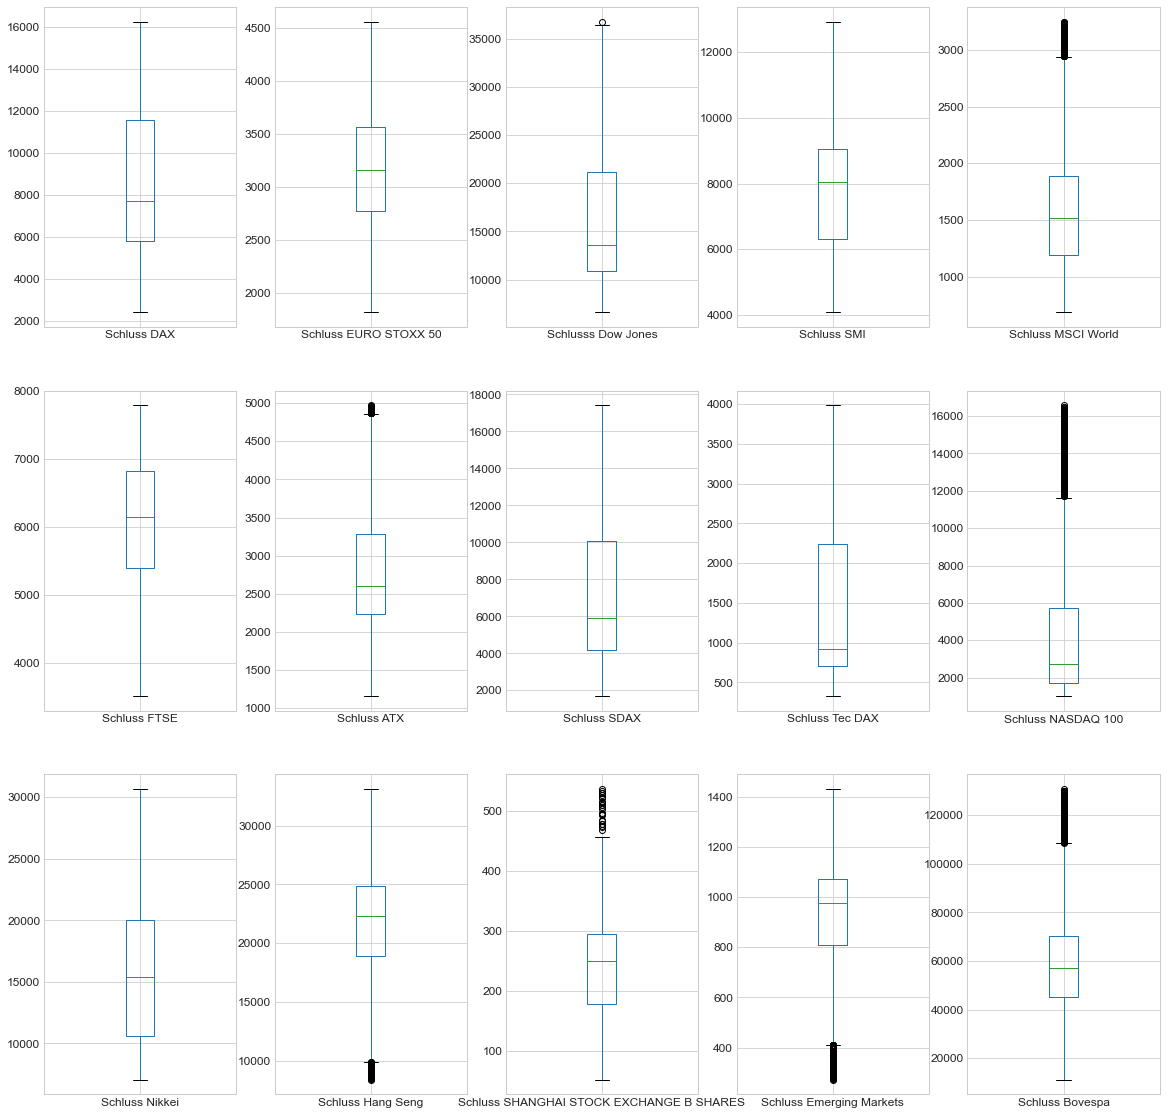

In [105]:
result.plot(kind="box", subplots=True, layout= (3,5), fontsize=12, figsize=(20,20));

## Get Data with API (Yahoo-Finance)

In [236]:
#!pip install pathlib
#!pip install ruamel-yaml
#!pip install yfinance
#!pip install requests
#!pip install cryptowatch
#!pip install cryptowatch-sdk

In [106]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
tickers_list= ['PL=F','GC=F', 'CL=F', 'SI=F', 'ZW=F']
data = yf.download(tickers_list, '2002-1-1')['Adj Close']
print(data)

#CL=F: Öl
#PL=F: Platinum
#SI=F: Silver
#ZW=F: Weizen

data

#data.to_csv("Rohstoffe.csv") 

[*********************100%***********************]  5 of 5 completed
                  CL=F         GC=F        PL=F       SI=F     ZW=F
Date                                                               
2001-12-31   19.840000   278.700012  493.000000   4.579000   291.00
2002-01-02   21.010000   278.899994  483.500000   4.526000   292.00
2002-01-03   20.370001   278.200012  485.500000   4.599000   292.25
2002-01-04   21.620001   278.899994  478.200012   4.642000   301.00
2002-01-07   21.480000   278.600006  476.299988   4.660000   308.00
...                ...          ...         ...        ...      ...
2022-05-24  109.769997  1865.099976  946.799988  22.063000  1154.75
2022-05-25  110.330002  1846.199951  933.400024  21.860001  1148.25
2022-05-26  114.089996  1847.400024  941.500000  21.941000  1143.25
2022-05-27  115.070000  1851.300049  945.500000  22.059999  1157.50
2022-05-31  117.779999  1848.199951  969.400024  21.785000  1092.75

[5142 rows x 5 columns]


,CL=F,GC=F,PL=F,SI=F,ZW=F
Date,,,,,
2001-12-31,19.840000,278.700012,493.000000,4.579000,291.00
2002-01-02,21.010000,278.899994,483.500000,4.526000,292.00
2002-01-03,20.370001,278.200012,485.500000,4.599000,292.25
2002-01-04,21.620001,278.899994,478.200012,4.642000,301.00
2002-01-07,21.480000,278.600006,476.299988,4.660000,308.00
...,...,...,...,...,...
2022-05-24,109.769997,1865.099976,946.799988,22.063000,1154.75
2022-05-25,110.330002,1846.199951,933.400024,21.860001,1148.25
2022-05-26,114.089996,1847.400024,941.500000,21.941000,1143.25


## Data Cleansing and Preparation Yahoo-Finance

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
result[SchlussIndexListe] = result[SchlussIndexListe].astype(float, errors = 'raise')
print(result.info())

In [ ]:
result = result.dropna()
result.isna().sum()

In [ ]:
result.isnull().sum()

In [ ]:
result.duplicated()

In [ ]:
result.duplicated().sum()

In [ ]:
result.describe()

In [ ]:
result.to_csv("Indizes.csv")    
result

In [ ]:
print("Anzahl Zeilen im Datensatz: {}".format(result.shape[0]))
print("Anzahl Spalten im Datensatz: {}".format(result.shape[1]))

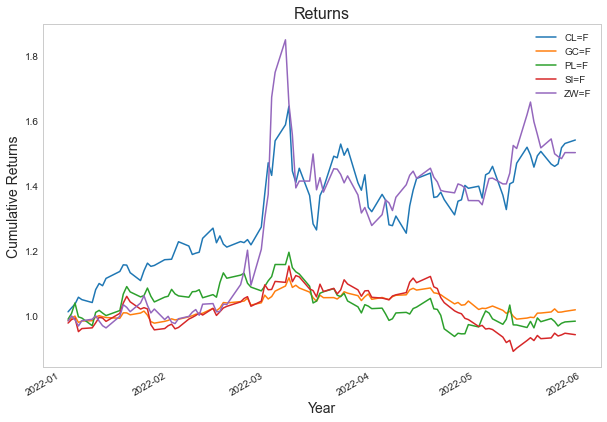

In [238]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

## Get Data with API (Cryptowatch)

In [ ]:
#!pip install pathlib
#!pip install ruamel-yaml
#!pip install yfinance

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
#Bibliotheksimport zur Warnungssteuerung
import warnings
warnings.filterwarnings("ignore")
#Instalacion e importacion de libreria de Cryptowatch
import logging
import cryptowatch as cw
#API-SCHLÜSSEL erforderlich, um die Cryptowatch-Bibliothek zu verwenden
cw.api_key = "BM0DRS9QDJ4W7JCL76PD"

logging.basicConfig()
logging.getLogger("cryptowatch").setLevel(logging.WARNING)

cw.exchanges.list()

#Wählen Sie Exchange und CryptoActive zur Analyse aus


##Sehen Sie sich die verschiedenen Cryptoactives an, die in der ausgewählten Börse verfügbar sind
#list = []
#selected = cw.markets.list(MARKET)
#for market in selected.markets:
#    list.append(market.pair)
#df_list = pd.DataFrame (list, columns = ['Währung'])
#print(df_list)

#Wir wählen das Ticket (Paar der ausgewählten Kryptoaktiven) aus, von dem wir alle seine Daten erhalten möchten
#candles = cw.markets.get(MARKET+":"+TICKET, ohlc=True, periods=["1m","15m","4h", "1h", "1d", "1w"])
MARKET ="BINANCE"
IndexTICKET=["etheur", "btceur", "xrpeur", "adaeur", "dogeeur", "neareur", "soleur"]
Indexdf=["dfetheur", "dfbtceur", "dfxrpeur", "dfadaeur", "dfdogeeur", "dfneareur", "dfsoleur"]

y=0

#while y < len(IndexTICKET):
candles = cw.markets.get(MARKET+":"+IndexTICKET[y], ohlc=True, periods=["1d"])

    # Wir generieren den Datenrahmen mit den Daten
rows_list = []
for x in candles.of_1d:
    close_ts = datetime.fromtimestamp(x[0])
    close_value = x[1]
    rows_list.append([IndexTICKET[y],close_ts , close_value])
Indexdf[y] = pd.DataFrame(rows_list,columns = ["ticket","close_ts" , IndexTICKET[y] +" close_value"])
Indexdf[y].drop(columns="ticket", inplace=True )

result=Indexdf[0]

#x=1
#result=Indexdf[0]
#while x < len(IndexListe):
    #result=pd.merge(result, Indexdf[x], how="inner", on="close_ts")
    #x+=1


#df = pd.DataFrame(rows_list,columns = ["ticket", "open_value"])
result.to_csv('CryptoIndizes.csv', index=False)
CryptoIndizes = pd.read_csv("CryptoIndizes.csv")
print(CryptoIndizes)

KeyboardInterrupt: 